In [8]:
import random

#from ch2.fitness import fitness
#from ch2.settings import , MAX_BORDER
MIN_BORDER=-10
MAX_BORDER=10

class Individual:

    def __init__(self, gene_list, fitness_function) -> None:
        self.gene_list = gene_list
        self.fitness = fitness_function(self.gene_list[0])

    def __str__(self) -> str:
        return f"{self.gene_list[0]:.2f} -> {self.fitness:.2f}"

    def get_gene(self):
        return self.gene_list[0]


def create_random_individual():
    return Individual([random.uniform(MIN_BORDER, MAX_BORDER)], fitness)


def create_individual(gene):
    return Individual([gene], fitness)

In [9]:
import numpy as np


def fitness(x):
    return np.sin(x) - .2 * abs(x)


if __name__ == '__main__':
#    from ch2.individual import Individual

    ind = Individual([1], fitness)
    print(f"Individual fitness: {ind.fitness}")
    # prints : 0.6414709848078965

Individual fitness: 0.6414709848078965


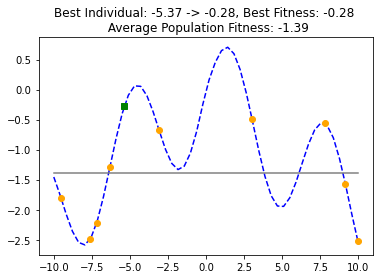

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt

#from ch2.individual import create_random_individual
#from ch2.fitness import fitness
#from ch2.settings import MIN_BORDER, MAX_BORDER


def get_best_individual(population):
    return max(population, key = lambda ind: ind.fitness)


def get_average_fitness(population):
    return sum([i.fitness for i in population]) / len(population)


def plot_population(population):
    best_ind = get_best_individual(population)
    best_fitness = best_ind.fitness
    average_fitness = get_average_fitness(population)

    x = np.linspace(MIN_BORDER, MAX_BORDER)
    plt.plot(x, fitness(x), '--', color = 'blue')
    plt.plot(
        [ind.get_gene() for ind in population],
        [ind.fitness for ind in population],
        'o', color = 'orange'
    )
    plt.plot(
        [best_ind.get_gene()], [best_ind.fitness],
        's', color = 'green')
    plt.plot(
        [MIN_BORDER, MAX_BORDER],
        [average_fitness, average_fitness],
        color = 'grey'
    )
    plt.title(f"Best Individual: {best_ind}, Best Fitness: {best_fitness:.2f} \n "
              f"Average Population Fitness: {average_fitness:.2f}"
              )
    plt.show()


if __name__ == '__main__':

    POPULATION_SIZE = 10

    random.seed(22)

    population = [create_random_individual() for _ in range(POPULATION_SIZE)]
    plot_population(population)


In [11]:
import random

#from ch2.individual import create_random_individual


def select_tournament(population, tournament_size):
    new_offspring = []
    for _ in range(len(population)):
        candidates = [random.choice(population) for _ in range(tournament_size)]
        new_offspring.append(max(candidates, key = lambda ind: ind.fitness))
    return new_offspring


if __name__ == '__main__':

    random.seed(29)

    POPULATION_SIZE = 5

    generation_1 = [create_random_individual() for _ in range(POPULATION_SIZE)]
    generation_2 = select_tournament(generation_1, 3)

    print("Generation 1")
    [print(ind) for ind in generation_1]

    print("Generation 2")
    [print(ind) for ind in generation_2]

Generation 1
0.96 -> 0.63
-3.08 -> -0.67
6.90 -> -0.80
-4.23 -> 0.04
0.21 -> 0.16
Generation 2
-4.23 -> 0.04
0.96 -> 0.63
-4.23 -> 0.04
0.96 -> 0.63
0.21 -> 0.16


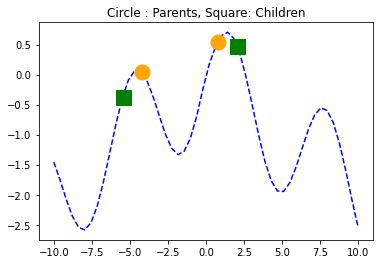

In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt

#from ch2.individual import create_random_individual, create_individual
#from ch2.fitness import fitness
#from ch2.settings import MIN_BORDER, MAX_BORDER


def gene_constraints(g, min_ = MIN_BORDER, max_ = MAX_BORDER):
    if max_ and g > max_:
        g = max_
    if min_ and g < min_:
        g = min_
    return g


def crossover_blend(g1, g2, alpha = 0.3):
    shift = (1. + 2. * alpha) * random.random() - alpha
    new_g1 = (1. - shift) * g1 + shift * g2
    new_g2 = shift * g1 + (1. - shift) * g2

    return gene_constraints(new_g1), gene_constraints(new_g2)


def crossover(ind1, ind2):
    offspring_genes = crossover_blend(ind1.get_gene(), ind2.get_gene())
    return [create_individual(offspring_genes[0]),
            create_individual(offspring_genes[1])]


if __name__ == '__main__':
    random.seed(30)

    p_1 = create_random_individual()
    p_2 = create_random_individual()

    offspring = crossover(p_1, p_2)

    c_1 = offspring[0]
    c_2 = offspring[1]

    x = np.linspace(MIN_BORDER, MAX_BORDER)
    plt.plot(x, fitness(x), '--', color = 'blue')
    plt.plot(
        [p_1.get_gene(), p_2.get_gene()],
        [p_1.fitness, p_2.fitness],
        'o', markersize = 15, color = 'orange'
    )
    plt.plot(
        [c_1.get_gene(), c_2.get_gene()],
        [c_1.fitness, c_2.fitness],
        's', markersize = 15, color = 'green'
    )
    plt.title("Circle : Parents, Square: Children")
    plt.show()


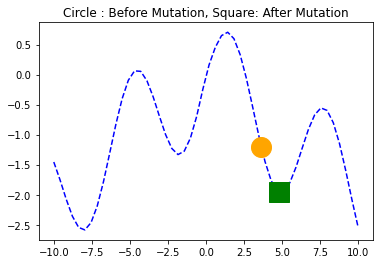

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt

#from ch2.individual import create_random_individual, create_individual
#from ch2.fitness import fitness
#from ch2.settings import MIN_BORDER, MAX_BORDER


def gene_constraints(g, min_ = MIN_BORDER, max_ = MAX_BORDER):
    if max_ and g > max_:
        g = max_
    if min_ and g < min_:
        g = min_
    return g


def mutate_gaussian(g, mu, sigma):
    mutated_gene = g + random.gauss(mu, sigma)
    return gene_constraints(mutated_gene)


def mutate(ind):
    return create_individual(mutate_gaussian(ind.get_gene(), 0, 1))


if __name__ == '__main__':

    random.seed(37)

    individual = create_random_individual()
    mutated = mutate(individual)

    x = np.linspace(MIN_BORDER, MAX_BORDER)
    plt.plot(x, fitness(x), '--', color = 'blue')
    plt.plot(
        [individual.get_gene()],
        [individual.fitness],
        'o', markersize = 20, color = 'orange'
    )
    plt.plot(
        [mutated.get_gene()],
        [mutated.fitness],
        's', markersize = 20, color = 'green'
    )
    plt.title("Circle : Before Mutation, Square: After Mutation")
    plt.show()


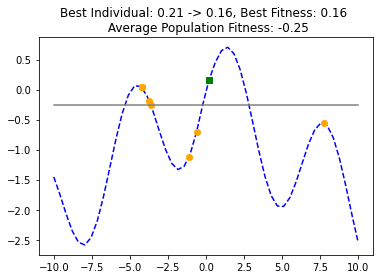

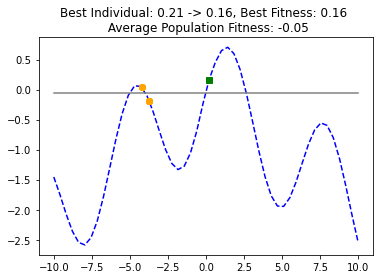

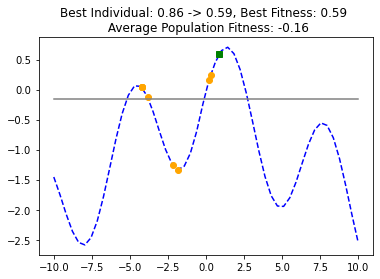

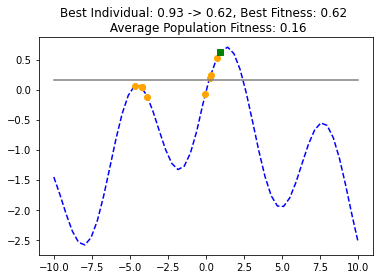

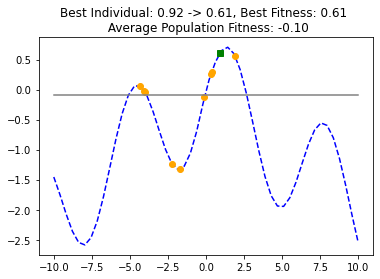

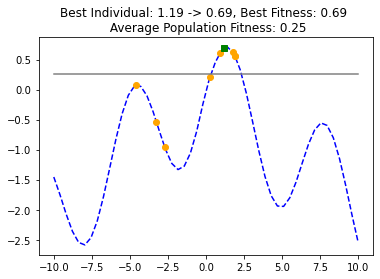

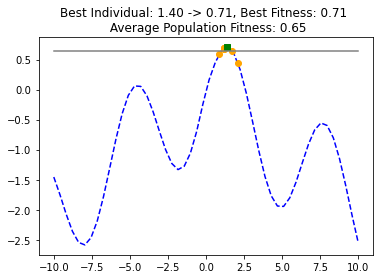

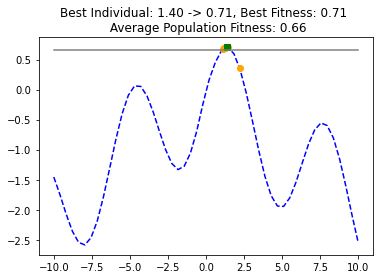

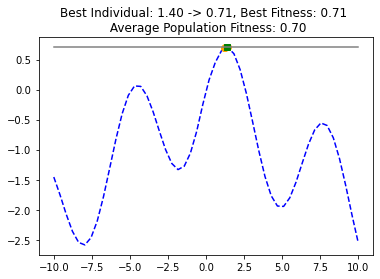

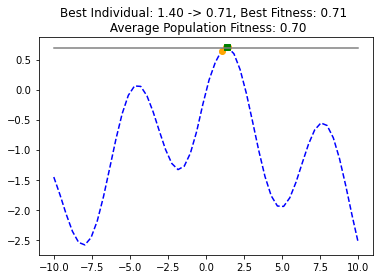

In [14]:
import random

#from ch2.crossover import crossover
#from ch2.individual import create_random_individual
#from ch2.mutate import mutate
#from ch2.population import plot_population
#from ch2.selection import select_tournament

if __name__ == '__main__':

    POPULATION_SIZE = 10
    CROSSOVER_PROBABILITY = .8
    MUTATION_PROBABILITY = .1
    MAX_GENERATIONS = 10

    random.seed(29)

    population = [create_random_individual() for _ in range(POPULATION_SIZE)]

    for generation_number in range(POPULATION_SIZE):
        # SELECTION
        selected = select_tournament(population, 3)
        # CROSSOVER
        crossed_offspring = []
        for ind1, ind2 in zip(selected[::2], selected[1::2]):
            if random.random() < CROSSOVER_PROBABILITY:
                children = crossover(ind1, ind2)
                crossed_offspring.append(children[0])
                crossed_offspring.append(children[1])
            else:
                crossed_offspring.append(ind1)
                crossed_offspring.append(ind2)
        # MUTATION
        mutated = []
        for ind in crossed_offspring:
            if random.random() < MUTATION_PROBABILITY:
                mutated.append(mutate(ind))
            else:
                mutated.append(ind)

        population = mutated

        plot_population(population)
